# Importing all the necessary libraries 

# Importing all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import pickle

In [2]:
df=pd.read_csv('MagicBricks.csv')

In [3]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

# Data cleaning 

In [5]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(include=np.number)

In [8]:
df_cat.isnull().sum()

Furnishing     5
Locality       0
Status         0
Transaction    0
Type           5
dtype: int64

In [10]:

def impute_nulls_with_mode(data):
    for col in data.columns:
        data[col].fillna(data[col].mode()[0], inplace=True)
    return data

In [12]:
df_cat_main=impute_nulls_with_mode(df_cat)

In [13]:
df_cat_main.isnull().sum()

Furnishing     0
Locality       0
Status         0
Transaction    0
Type           0
dtype: int64

In [18]:
def impute_median(data): 
    for col in data.columns:
        data[col].fillna(data[col].median(), inplace = True)
    return data

In [20]:
df_num_main=impute_median(df_num)

In [22]:
df_num_main.isnull().sum()

Area        0
BHK         0
Bathroom    0
Parking     0
Price       0
Per_Sqft    0
dtype: int64

In [23]:
df_main=pd.concat([df_num_main,df_cat_main],axis=1).reset_index()

In [25]:
df_main.isnull().sum()

index          0
Area           0
BHK            0
Bathroom       0
Parking        0
Price          0
Per_Sqft       0
Furnishing     0
Locality       0
Status         0
Transaction    0
Type           0
dtype: int64

In [27]:
## Checking for Duplicates 

def check_duplicate_values(dataset): 
  seen_values = set() 
  for value in dataset: 
    if value in seen_values: 
      return True
    else: 
      seen_values.add(value) 
  return False

In [28]:
check_duplicate_values(df_main)

False

In [29]:
## No duplicate values found 

# #Performing feature encoding on the dataset 


In [32]:
df_dummy=pd.get_dummies(df_main.Type,drop_first=True)

In [35]:
df_main.drop(columns='Type',inplace=True)

In [37]:
df_main=pd.concat([df_main,df_dummy],axis=1)

In [39]:
df_main.Area=df_main.Area.astype(int)

In [41]:
df_main.Bathroom=df_main.Bathroom.astype(int)

In [43]:
df_main.Parking=df_main.Parking.astype(int)

In [45]:
df_main.Furnishing.unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [47]:
df_main.Furnishing=df_main.Furnishing.map({'Semi-Furnished':1,'Furnished':2,'Unfurnished':0})

In [52]:
df_main.Status.unique()

array(['Ready_to_move', 'Almost_ready'], dtype=object)

In [53]:
df_main.Status=df_main.Status.map({'Ready_to_move':1,'Almost_ready':0})

In [55]:
df_main.Transaction.unique()

array(['New_Property', 'Resale'], dtype=object)

In [56]:
df_main.Transaction=df_main.Transaction.map({'New_Property':1,'Resale':0})

In [57]:
df_main

,index,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Furnishing,Locality,Status,Transaction,Builder_Floor
0,0,800,3,2,1,6500000,11291.5,1,Rohini Sector 25,1,1,1
1,1,750,2,2,1,5000000,6667.0,1,"J R Designers Floors, Rohini Sector 24",1,1,0
2,2,950,2,2,1,15500000,6667.0,2,"Citizen Apartment, Rohini Sector 13",1,0,0
3,3,600,2,2,1,4200000,6667.0,1,Rohini Sector 24,1,0,1
4,4,650,2,2,1,6200000,6667.0,1,Rohini Sector 24 carpet area 650 sqft status R...,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1254,4118,4,5,3,55000000,12916.0,0,Chittaranjan Park,1,1,1
1255,1255,1050,3,2,3,12500000,12916.0,1,Chittaranjan Park,1,0,1
1256,1256,875,3,3,3,17500000,12916.0,1,Chittaranjan Park,1,1,1
1257,1257,990,2,2,1,11500000,12916.0,0,Chittaranjan Park Block A,1,0,1


# Dropping Locality 


In [ ]:
##df_main.drop(columns='Locality',inplace=True)

# Performing Train Test Split

In [78]:
X=df_main.drop(columns='Price')
y=df_main['Price']

In [81]:
X

,Area,BHK,Bathroom,Parking,Per_Sqft,Furnishing,Status,Transaction,Builder_Floor
0,800,3,2,1,11291.5,1,1,1,1
1,750,2,2,1,6667.0,1,1,1,0
2,950,2,2,1,6667.0,2,1,0,0
3,600,2,2,1,6667.0,1,1,0,1
4,650,2,2,1,6667.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1254,4118,4,5,3,12916.0,0,1,1,1
1255,1050,3,2,3,12916.0,1,1,0,1
1256,875,3,3,3,12916.0,1,1,1,1
1257,990,2,2,1,12916.0,0,1,0,1


In [82]:
y

0        6500000
1        5000000
2       15500000
3        4200000
4        6200000
          ...   
1254    55000000
1255    12500000
1256    17500000
1257    11500000
1258    18500000
Name: Price, Length: 1259, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1007, 9)
Shape of X_test: (252, 9)
Shape of y_train: (1007,)
Shape of y_test: (252,)


# Scaling the dataset

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [93]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [91]:
from sklearn.ensemble import AdaBoostRegressor


# Load the Boston dataset

X = X_train
y = y_train

# Create an AdaBoost regressor
regr = AdaBoostRegressor()

# Fit the model
regr.fit(X,y)

# Make predictions
predictions = regr.predict(X_test)

In [92]:
predictions

array([1.98578295e+07, 1.98578295e+07, 1.28330986e+07, 2.93741667e+07,
       2.30035202e+07, 3.05826484e+07, 3.27488189e+07, 2.84753425e+07,
       2.79545455e+07, 6.00354545e+07, 1.28330986e+07, 1.59788000e+07,
       2.79545455e+07, 3.12636364e+07, 1.21129231e+07, 2.95035714e+07,
       1.54205185e+07, 2.75567708e+07, 2.28017172e+07, 1.54205185e+07,
       2.30035202e+07, 1.94506481e+07, 3.27488189e+07, 4.84312808e+07,
       2.28017172e+07, 1.94506481e+07, 3.05826484e+07, 2.28017172e+07,
       2.95035714e+07, 4.06981013e+07, 2.84753425e+07, 2.02088710e+07,
       1.07151678e+08, 1.98392405e+07, 1.21129231e+07, 1.94506481e+07,
       1.28330986e+07, 2.30035202e+07, 1.28330986e+07, 2.30035202e+07,
       2.93741667e+07, 1.21129231e+07, 2.28017172e+07, 2.29511111e+07,
       1.21129231e+07, 4.29495876e+07, 1.54205185e+07, 1.28330986e+07,
       3.05826484e+07, 2.61013393e+07, 1.59788000e+07, 1.21129231e+07,
       1.21129231e+07, 2.80781356e+07, 4.65567164e+07, 2.93741667e+07,
      

In [97]:
scores = cross_val_score(regr, X_train,y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())


Mean cross-validataion score: 0.76


In [98]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.73


In [103]:
ypred = regr.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)
MSE: 15.82 
print("RMSE: %.2f" % np.sqrt(mse))
RMSE: 3.98  

MSE: 135146312533854.20
RMSE: 11625244.62


In [109]:
from sklearn.model_selection import GridSearchCV

# create a dictionary of all values we want to test
param_grid = {'n_estimators':[100, 500, 1000], 
              'learning_rate': [0.001, 0.01, 0.1, 0.5, 1], 
              'loss':['linear', 'square', 'exponential']
             }

# use gridsearch to test all values
grid = GridSearchCV(regr, param_grid, cv = 3)

# fit model to data
grid.fit(X_train, y_train)

# print best parameter after tuning 
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 100}
AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=100)


In [110]:
from sklearn.ensemble import AdaBoostRegressor


# Load the Boston dataset

X = X_train
y = y_train

# Create an AdaBoost regressor
regr_final = AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=100)

# Fit the model
regr_final.fit(X,y)

# Make predictions
predictions = regr_final.predict(X_test)

In [111]:
predictions 

array([1.75767857e+07, 1.84797590e+07, 1.14165766e+07, 2.24011494e+07,
       2.23495808e+07, 2.74854922e+07, 3.31321678e+07, 2.35231707e+07,
       2.38356881e+07, 5.50108421e+07, 1.12767220e+07, 1.29341885e+07,
       2.47336634e+07, 2.72298851e+07, 1.12767220e+07, 2.74854922e+07,
       1.19923377e+07, 2.35231707e+07, 2.23495808e+07, 1.26639303e+07,
       2.16420290e+07, 1.35749660e+07, 3.12000000e+07, 4.95093023e+07,
       2.09147541e+07, 1.39220354e+07, 2.75751381e+07, 2.23495808e+07,
       2.75338710e+07, 4.00698701e+07, 2.38356881e+07, 1.68041463e+07,
       7.35137931e+07, 1.84797590e+07, 1.07179688e+07, 1.55425641e+07,
       1.14165766e+07, 2.23495808e+07, 1.26639303e+07, 1.87309346e+07,
       2.56140678e+07, 1.12767220e+07, 2.11296970e+07, 2.09147541e+07,
       1.12767220e+07, 3.56694215e+07, 1.26639303e+07, 1.14165766e+07,
       2.47336634e+07, 2.05829738e+07, 1.29341885e+07, 1.08257724e+07,
       1.08257724e+07, 2.24011494e+07, 4.91542857e+07, 2.56140678e+07,
      

In [112]:
scores = cross_val_score(regr_final, X_train,y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())


Mean cross-validataion score: 0.79


In [115]:
ypred = regr_final.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % np.sqrt(mse))


MSE: 109608518982921.94
RMSE: 10469408.72


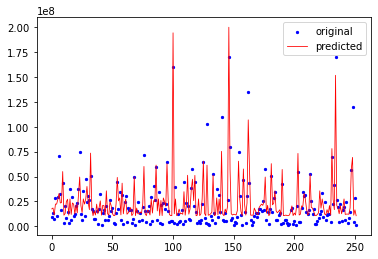

In [119]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()
